## Research on decision tree and random forest methods (COMP6208)

### -Based on Python 3.6.3, need approxiamtely 60s to run all the cells.
### -Required packages: numpy, pandas, scikit-learn, seaborn
### -Developed by Yuntao Yang(id29712068, UoS), Email: yy4y17@soton.ac.uk


### (1) Data Preprocessing

In [1]:
#-*- coding: utf-8 -*- 
# Explore the raw data

import pandas as pd

datafile= '../data/air_data.csv'
data = pd.read_csv(datafile, encoding = 'utf-8')

explore = data.describe(percentiles = [], include = 'all').T
explore['null'] = len(data)-explore['count']

explore = explore[['null', 'max', 'min']]
explore.columns = [u'Null', u'Max', u'Min'] #Rename

print(explore)

                         Null       Max   Min
MEMBER_NO                   0     62988     1
FFP_DATE                    0       NaN   NaN
FIRST_FLIGHT_DATE           0       NaN   NaN
GENDER                      3       NaN   NaN
FFP_TIER                    0         6     4
WORK_CITY                2269       NaN   NaN
WORK_PROVINCE            3245       NaN   NaN
WORK_COUNTRY               26       NaN   NaN
AGE                       420       110     6
LOAD_TIME                   0       NaN   NaN
FLIGHT_COUNT                0       213     2
BP_SUM                      0    505308     0
EP_SUM_YR_1                 0         0     0
EP_SUM_YR_2                 0     74460     0
SUM_YR_1                  551    239560     0
SUM_YR_2                  138    234188     0
SEG_KM_SUM                  0    580717   368
WEIGHTED_SEG_KM             0    558440     0
LAST_FLIGHT_DATE            0       NaN   NaN
AVG_FLIGHT_COUNT            0    26.625  0.25
AVG_BP_SUM                  0   63

In [2]:
# Return columns which contain Null value
import numpy as np
item = []
order = []
for i in range(explore.shape[0]):
    numofnull = explore.iloc[i]
    if numofnull[0] != 0:
        item.append(explore.index[i])
        order.append(i)
print(order)
print(item)

[3, 5, 6, 7, 8, 14, 15]
['GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'AGE', 'SUM_YR_1', 'SUM_YR_2']


In [3]:
# Detecting NaN rows
nan = []
i = 0
for title in item:
    ss = 0
    print(title)
    if isinstance(data.iloc[0][order[i]],str):
        print("str")
        for j in range(len(data[title])):
            ttt = data[title][j]
            if not(isinstance(ttt,str)):
                nan.append(j)
                ss += 1
            elif ttt == ".":
                nan.append(j)
        print(ss)
    else:
        print("nono-str")
        for j in range(len(data[title])):
            if np.isnan(data[title][j]):
                nan.append(j)
                ss += 1
        print(ss)
    i += 1

GENDER
str
3
WORK_CITY
str
2269
WORK_PROVINCE
str
3245
WORK_COUNTRY
str
26
AGE
nono-str
420
SUM_YR_1
nono-str
551
SUM_YR_2
nono-str
138


In [4]:
# Extraction
for i in data.index:
    l =  float(data['P1Y_Flight_Count'][i]) + float(data['L1Y_Flight_Count'][i])
    if l <= 6:
        nan.append(i)

In [5]:
# Data Cleaning
print(len(nan))
nan = list(set(nan))
print(len(nan))
nan.sort()
# Generate new data
rdata = data.drop(nan)


explore1 = rdata.describe(percentiles = [], include = 'all').T 
explore1['null'] = len(rdata)-explore1['count'] 

explore1 = explore1[['null', 'max', 'min']]
explore1.columns = [u'Null', u'Max', u'Min'] #Rename

print(explore1)

38611
33003
                        Null       Max       Min
MEMBER_NO                  0     62988         3
FFP_DATE                   0       NaN       NaN
FIRST_FLIGHT_DATE          0       NaN       NaN
GENDER                     0       NaN       NaN
FFP_TIER                   0         6         4
WORK_CITY                  0       NaN       NaN
WORK_PROVINCE              0       NaN       NaN
WORK_COUNTRY               0       NaN       NaN
AGE                        0       110        13
LOAD_TIME                  0       NaN       NaN
FLIGHT_COUNT               0       213         7
BP_SUM                     0    337314       241
EP_SUM_YR_1                0         0         0
EP_SUM_YR_2                0     47052         0
SUM_YR_1                   0    188926         0
SUM_YR_2                   0    174895         0
SEG_KM_SUM                 0    375074      1288
WEIGHTED_SEG_KM            0    306901      1058
LAST_FLIGHT_DATE           0       NaN       NaN
AVG_FLIG

In [6]:
# Convert 'Gender' data
gender = []
for i in rdata.index:
    l1 = rdata['GENDER'][i]
    if l1 == "男":
        gender.append(0)
    else:
        gender.append(1)
rdata.insert(len(rdata.columns),'gender',gender)

In [7]:
# Process Location data
city = []
province = []
country = []
for i in rdata.index:
    city.append(str(rdata['WORK_CITY'][i]))
    province.append(str(rdata['WORK_PROVINCE'][i]))
    country.append(str(rdata['WORK_COUNTRY'][i]))
city = list(set(city))
province = list(set(province))
country = list(set(country))

In [8]:
print(len(city))
#print(city)

1770


In [9]:
print(len(province))

682


In [10]:
print(len(country))
print(country)

61
['AE', 'EG', 'CY', 'MO', 'NI', 'VT', 'NO', 'CH', 'AN', 'SG', '中', 'BI', 'PE', 'SW', 'NG', 'TW', 'JP', 'AT', 'UK', 'KO', 'IT', 'IL', 'YE', 'GN', 'NL', 'US', 'VN', 'IR', 'TH', 'UA', 'HK', 'FL', 'PK', 'IN', 'EC', 'GB', 'ES', 'MN', 'PH', 'RO', 'CA', 'SE', 'SN', 'CN', 'MY', 'FR', 'KR', 'DE', 'KH', 'AU', 'BE', 'AS', 'HU', 'PS', 'BR', 'NZ', 'CC', 'KE', 'DK', 'AA', 'ID']


In [11]:
print("Detecting Contries ......")
count_country = []
for i in range(len(country)):
    count_country.append(0)
for i in rdata.index:
    for j in range(len(country)):
        if str(rdata['WORK_COUNTRY'][i]) == country[j]:
            count_country[j] += 1

for i in range(len(country)):
    if count_country[i]/len(rdata.index) > 0.1:
        print(country[i] + "   {0:.2f}%".format(count_country[i]/len(rdata.index) * 100))

Detecting Contries ......
CN   95.41%


In [12]:
# Create the new location feature
oversea = []
for i in rdata.index:
    l1 = str(rdata['WORK_COUNTRY'][i])
    if l1 == "CN" or l1 == "中":
        oversea.append(0)
    else:
        oversea.append(1)
rdata.insert(len(rdata.columns),'oversea',oversea)

In [13]:
avg_points = []
avg_fare = []
for i in rdata.index:
    ap = float(rdata['Points_Sum'][i])/float(rdata['SEG_KM_SUM'][i])
    af = (float(rdata['SUM_YR_1'][i])+float(rdata['SUM_YR_2'][i]))/float(rdata['SEG_KM_SUM'][i])
    avg_points.append(ap)
    avg_fare.append(af)
rdata.insert(len(rdata.columns),'avg_points',avg_points)
rdata.insert(len(rdata.columns),'avg_fare',avg_fare)

In [14]:
# Samples
rdata.ix[:15]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight,gender,oversea,avg_points,avg_fare
3,21189,2008/08/22,2008/08/23,男,5,Los Angeles,CA,US,64.0,2014/03/31,...,186100,0.434783,0.565217,0.551722,0.448275,12,0,1,1.322987,0.859648
4,39546,2009/04/10,2009/04/15,男,6,贵阳,贵州,CN,48.0,2014/03/31,...,210365,0.532895,0.467105,0.469054,0.530943,39,0,0,1.093199,0.823617
5,56972,2008/02/10,2009/09/29,男,6,广州,广东,CN,64.0,2014/03/31,...,152538,0.456522,0.543478,0.608233,0.391764,15,0,0,1.164761,0.642633
6,44924,2006/03/22,2006/03/29,男,6,乌鲁木齐市,新疆,CN,46.0,2014/03/31,...,175673,0.504950,0.495050,0.495048,0.504948,29,0,0,1.041217,0.818588
7,22631,2010/04/09,2010/04/09,女,6,温州市,浙江,CN,50.0,2014/03/31,...,193601,0.589041,0.410959,0.522078,0.477919,14,1,0,1.222707,0.687292
9,31645,2010/07/05,2010/07/05,女,6,温州,浙江,CN,43.0,2014/03/31,...,143958,0.390625,0.609375,0.526951,0.473044,16,1,0,0.671619,0.387990
10,58877,2010/11/18,2010/11/20,女,6,PARIS,PARIS,FR,34.0,2014/03/31,...,197445,0.534884,0.465116,0.470612,0.529384,3,1,1,1.289398,0.613088
12,28012,2006/11/23,2007/11/18,男,5,SAN MARINO,CA,US,58.0,2014/03/31,...,156214,0.517241,0.482759,0.426090,0.573905,4,0,1,0.764497,0.307055
13,54943,2006/10/25,2007/10/27,男,6,深圳,广东,CN,47.0,2014/03/31,...,158779,0.559322,0.440678,0.452211,0.547785,20,0,0,1.507983,1.255044
14,57881,2010/02/01,2010/02/01,女,6,广州,广东,CN,45.0,2014/03/31,...,186491,0.500000,0.500000,0.487910,0.512086,12,1,0,1.215791,0.548075


In [15]:
# Generate y labels
y_true = []
mclass = 0
for i in rdata.index:
    l1 = float(rdata['P1Y_Flight_Count'][i])
    #print(l1)
    l2 = float(rdata['L1Y_Flight_Count'][i])
    if l1 == 0:
        mclass = 2
    else:
        mclass = l2/l1
    if mclass < 0.3:
        mclass = 0
    elif mclass >= 0.9:
        mclass = 2
    else:
        mclass = 1
    y_true.append(mclass)

### (2) Decision Trees

In [16]:
# Define the figure plotting function (for every single section)
import seaborn as sns
import matplotlib.pyplot as plt
def figplot(scores,tag,color):
    od = []
    for i in range(10):
        od.append(i+1)
    inputs = pd.DataFrame()
    inputs.insert(len(inputs.columns),'10-fold Cross Validation',od)
    inputs.insert(len(inputs.columns),'Accuracy',scores)

    sns.set( palette="muted", color_codes=True)  
    sns.set_style("darkgrid")
    
    xs = np.array(od)
    ys = np.array(scores)
    my_y_ticks1 = np.arange(0, 1, 0.1)
    plt.xticks(rotation=0)

    bar_plot = sns.barplot(x = inputs['10-fold Cross Validation'],y=inputs['Accuracy'],color=color)
    line_plot = plt.plot(ys,'-o',color="k")
    plt.title("Bar Chart -- " + tag)
    plt.axis([-1,10,0,1]) 
    plt.yticks(my_y_ticks1)
    plt.show()

In [17]:
# Define the tree function, using 10-fold cross validation
def CreateTree(X,y_true,tag,color):
    clf = DecisionTreeClassifier(random_state=14) 
    scores = cross_val_score(clf, X[:10235], y_true[:10235],scoring='accuracy',cv = 10)
    print("Decision Tree: " + tag)
    print("Accuracy: {0:.1f}%  Standard Deviation: {1:.3f}".format(np.mean(scores) * 100, np.std(scores) ))
    print("Max: {0:.3f}  Min: {1:.3f}  Range: {2:.3f} ".format(max(scores), min(scores), max(scores)-min(scores) ))
    print(scores)
    figplot(scores,tag,color)
    result = [np.mean(scores) * 100, np.std(scores)]
    return result

In [18]:
# Initializition
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score
results = []

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### (a) All features

Decision Tree: Allfeatures
Accuracy: 70.2%  Standard Deviation: 0.151
Max: 0.788  Min: 0.262  Range: 0.526 
[ 0.64878049  0.72878049  0.74316406  0.77539062  0.77832031  0.75562072
  0.77614858  0.78787879  0.76027397  0.26223092]


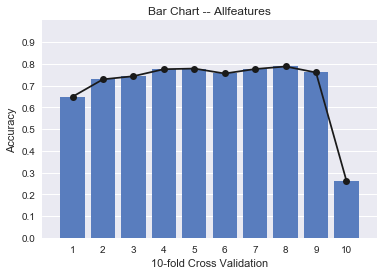

In [19]:
X_allfeatures = rdata[[ "FFP_TIER","AGE","FLIGHT_COUNT","BP_SUM","EP_SUM_YR_2","SUM_YR_1", "SUM_YR_2","SEG_KM_SUM",
    "WEIGHTED_SEG_KM","AVG_FLIGHT_COUNT","AVG_BP_SUM","BEGIN_TO_FIRST","LAST_TO_END","BEGIN_TO_FIRST","AVG_INTERVAL",
    "MAX_INTERVAL","EXCHANGE_COUNT","avg_discount","ADD_POINTS_SUM_YR_1","ADD_POINTS_SUM_YR_2","avg_discount","P1Y_BP_SUM",
    "L1Y_BP_SUM","EP_SUM","ADD_Point_SUM","Eli_Add_Point_Sum","L1Y_ELi_Add_Points","Points_Sum","L1Y_Points_Sum",
    "Ration_P1Y_BPS","Ration_L1Y_BPS","Point_NotFlight","gender","oversea","avg_points","avg_fare"]].values

result_afs = CreateTree(X_allfeatures,y_true,"Allfeatures","b")
results.append(result_afs)

#### (b) Basic Information

Decision Tree: Basicinfo
Accuracy: 60.5%  Standard Deviation: 0.013
Max: 0.627  Min: 0.585  Range: 0.042 
[ 0.60780488  0.60878049  0.61328125  0.62695312  0.62207031  0.59824047
  0.59824047  0.5884653   0.5851272   0.59686888]


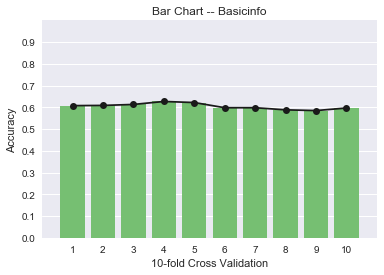

In [20]:
X_basicinfo = rdata[[ "FFP_TIER",
                      "AGE",
                      "gender",
                      "oversea"  ]].values

result_bif = CreateTree(X_basicinfo,y_true,"Basicinfo","g")
results.append(result_bif)

#### (c) Frequency-related features

Decision Tree: Frequency
Accuracy: 59.1%  Standard Deviation: 0.024
Max: 0.640  Min: 0.553  Range: 0.087 
[ 0.64        0.57560976  0.57617188  0.60742188  0.58886719  0.56891496
  0.60997067  0.58651026  0.55283757  0.6037182 ]


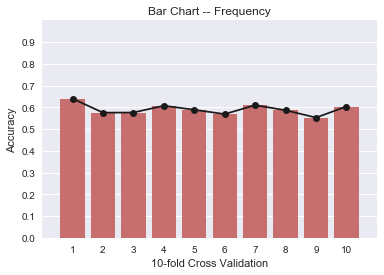

In [21]:
X_frequency = rdata[[  "FLIGHT_COUNT",
                        "AVG_FLIGHT_COUNT",
                        "BEGIN_TO_FIRST",
                        "LAST_TO_END",
                        "BEGIN_TO_FIRST",
                        "AVG_INTERVAL",
                        "MAX_INTERVAL"  ]].values

result_frq = CreateTree(X_frequency,y_true,"Frequency","r")
results.append(result_frq)

####  (d) Points-related features

Decision Tree: Points
Accuracy: 65.1%  Standard Deviation: 0.159
Max: 0.750  Min: 0.181  Range: 0.569 
[ 0.64487805  0.71121951  0.71289062  0.703125    0.70507812  0.69794721
  0.68817204  0.714565    0.75048924  0.18101761]


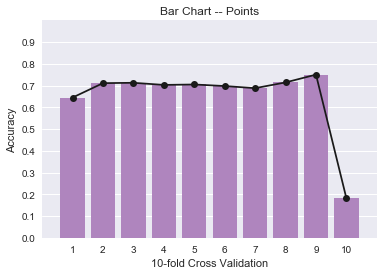

In [22]:
X_points = rdata[[  "BP_SUM",
                    "EP_SUM_YR_2",
                    "SEG_KM_SUM",
                    "WEIGHTED_SEG_KM",
                    "AVG_BP_SUM",
                    "AVG_FLIGHT_COUNT",
                    "P1Y_BP_SUM",
                    "L1Y_BP_SUM",
                    "EP_SUM",
                    "Points_Sum",
                    "L1Y_Points_Sum",
                    "Ration_P1Y_BPS",
                    "Ration_L1Y_BPS",
                    "avg_points"  ]].values

result_pts = CreateTree(X_points,y_true,"Points","m")
results.append(result_pts)

####  (e) Fare-related features

Decision Tree: Fare
Accuracy: 63.2%  Standard Deviation: 0.073
Max: 0.750  Min: 0.522  Range: 0.227 
[ 0.68390244  0.54536585  0.52246094  0.65234375  0.7109375   0.67350929
  0.63929619  0.5884653   0.74951076  0.5518591 ]


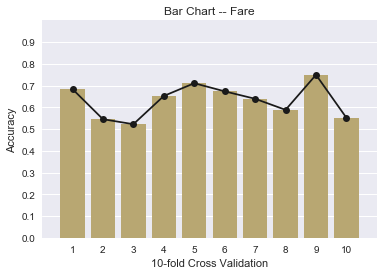

In [23]:
X_fare = rdata[[  "SUM_YR_1", 
                  "SUM_YR_2",
                  "WEIGHTED_SEG_KM",
                  "avg_discount",
                  "avg_fare",
                  "EXCHANGE_COUNT",
                  "ADD_POINTS_SUM_YR_1",
                  "ADD_POINTS_SUM_YR_2",
                  "ADD_Point_SUM",
                  "Eli_Add_Point_Sum",
                  "L1Y_ELi_Add_Points" ]].values

result_fare = CreateTree(X_fare,y_true,"Fare","y")
results.append(result_fare)

#### (f) The most optimal tree

Decision Tree: Best
Accuracy: 77.5%  Standard Deviation: 0.019
Max: 0.799  Min: 0.735  Range: 0.064 
[ 0.73463415  0.74926829  0.76855469  0.79589844  0.79199219  0.78494624
  0.78005865  0.79863148  0.77299413  0.77005871]


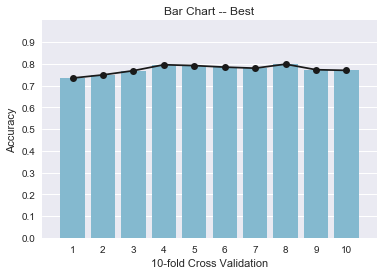

In [24]:
X_best = rdata[["SUM_YR_1", "SUM_YR_2"]].values

result_best = CreateTree(X_best,y_true,"Best","c")
results.append(result_best)

### Comprision - Decision Trees

In [25]:
# Define the figure plotting function (for decision tree comprision)
def figplot2(results, xtag, ytag, scale, log):
    features = ["AllFeatures", "BasicInfo", "Frequencey", "Points", "Fare", "Best"]
    inputs = pd.DataFrame()
    inputs.insert(len(inputs.columns), xtag, features)
    inputs.insert(len(inputs.columns), ytag, results)
    
    sns.set( palette="muted", color_codes=True)  
    sns.set_style("darkgrid")
    bar_plot = sns.barplot(x = inputs[xtag],y=inputs[ytag])
    plt.xticks(rotation=45)
    plt.title(log)
    if scale != 0:
        plt.axis([-1,6,0,1])
    else:
        scale = 0.3
    my_y_ticks = np.arange(0, scale, scale/10)
    plt.yticks(my_y_ticks)
    plt.show()

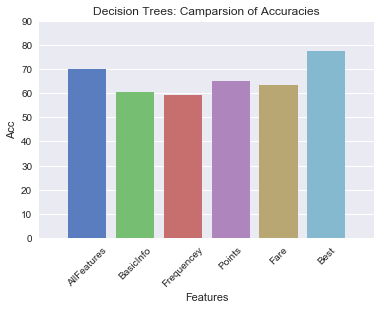

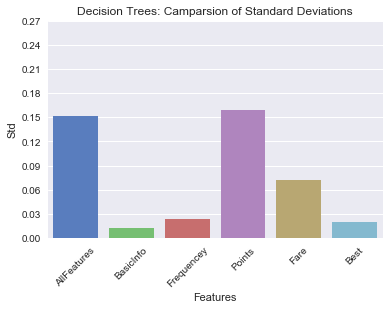

In [26]:
# Demonstration in terms of Accuracies & Standard Deviations
import operator
from functools import reduce
rst = reduce(operator.add, results)
figplot2(rst[0::2], "Features", "Acc", 100, "Decision Trees: Camparsion of Accuracies")
figplot2(rst[1::2], "Features", "Std", 0, "Decision Trees: Camparsion of Standard Deviations")

### (3) Random Forests

In [27]:
# Define the forest function, using 10-fold cross validation
from sklearn.ensemble import RandomForestClassifier
Results = []
def CreateForest(X,y_true,tag,color):
    clff = RandomForestClassifier(random_state=14) 
    scores = cross_val_score(clff, X[:10235], y_true[:10235],scoring='accuracy',cv = 10)
    print("Random Forest: " + tag)
    print("Accuracy: {0:.1f}%  Standard Deviation: {1:.3f}".format(np.mean(scores) * 100, np.std(scores) ))
    print("Max: {0:.3f}  Min: {1:.3f}  Range: {2:.3f} ".format(max(scores), min(scores), max(scores)-min(scores) ))
    print(scores)
    figplot(scores,tag,color)
    result = [np.mean(scores) * 100, np.std(scores)]
    return result

#### (a') All features

Random Forest: Allfeatures
Accuracy: 79.4%  Standard Deviation: 0.042
Max: 0.833  Min: 0.680  Range: 0.153 
[ 0.68        0.78829268  0.79882812  0.82617188  0.81640625  0.78690127
  0.81622678  0.83284457  0.82485323  0.7739726 ]


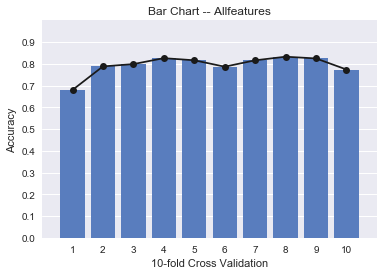

In [28]:
Result_afs = CreateForest(X_allfeatures,y_true,"Allfeatures","b")
Results.append(Result_afs)

#### (b') Basic Information

Random Forest: BasicInfo
Accuracy: 60.9%  Standard Deviation: 0.014
Max: 0.628  Min: 0.585  Range: 0.043 
[ 0.61268293  0.61853659  0.62207031  0.62597656  0.62792969  0.60215054
  0.59921799  0.59237537  0.5851272   0.60176125]


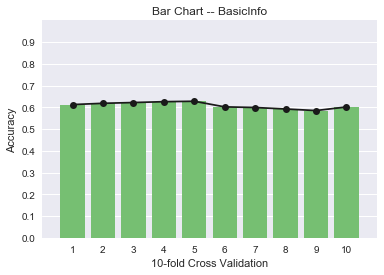

In [29]:
Result_bif = CreateForest(X_basicinfo,y_true,"BasicInfo","g")
Results.append(Result_bif)

#### (c') Frequency-related features

Random Forest: Frequency
Accuracy: 63.3%  Standard Deviation: 0.014
Max: 0.658  Min: 0.619  Range: 0.038 
[ 0.65756098  0.65560976  0.62597656  0.63671875  0.62597656  0.61974585
  0.64613881  0.62365591  0.62328767  0.61937378]


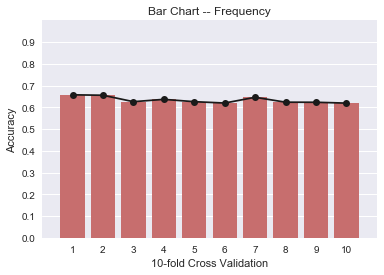

In [30]:
Result_frq = CreateForest(X_frequency,y_true,"Frequency","r")
Results.append(Result_frq)

#### (d') Points-related features

Random Forest: Points
Accuracy: 69.1%  Standard Deviation: 0.101
Max: 0.797  Min: 0.412  Range: 0.386 
[ 0.68390244  0.68390244  0.68066406  0.7265625   0.71875     0.68230694
  0.77810362  0.74975562  0.79745597  0.41193738]


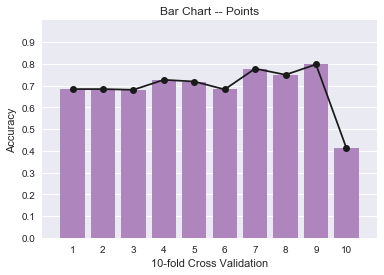

In [31]:
Result_pts = CreateForest(X_points,y_true,"Points","m")
Results.append(Result_pts)

#### (e') Points-related features

Random Forest: Fare
Accuracy: 69.6%  Standard Deviation: 0.067
Max: 0.791  Min: 0.581  Range: 0.209 
[ 0.70439024  0.58146341  0.60253906  0.70507812  0.72070312  0.69110459
  0.77614858  0.74975562  0.79060665  0.63796477]


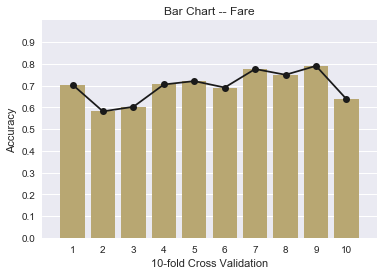

In [32]:
Result_fare = CreateForest(X_fare,y_true,"Fare","y")
Results.append(Result_fare)

#### (f') The most optimal forest

Random Forest: Best
Accuracy: 80.5%  Standard Deviation: 0.022
Max: 0.840  Min: 0.754  Range: 0.086 
[ 0.75414634  0.7902439   0.79199219  0.83984375  0.81445312  0.80156403
  0.81329423  0.82991202  0.8111546   0.80039139]


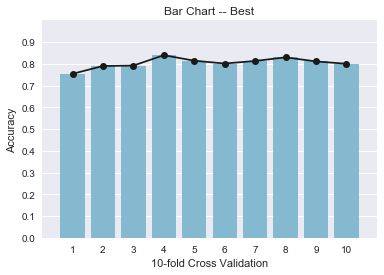

In [33]:
Result_best = CreateForest(X_best,y_true,"Best","c")
Results.append(Result_best)

### Comprision - Random Forests

In [34]:
# Define the figure plotting function (for decision tree comprision)
def figplot3(Results, results, xtag, ytag, scale, log):
    features = ["AllFeatures", "BasicInfo", "Frequencey", "Points", "Fare", "Best"]
    res = []
    for i in range(len(results)):
        res.append([Results[i],results[i]])

    inputs = pd.DataFrame()
    inputs.insert(len(inputs.columns), xtag, features)
    inputs.insert(len(inputs.columns), ytag, res)
    
    sns.set( palette="muted", color_codes=True)  
    sns.set_style("darkgrid")
    
    plt.xticks(rotation=45)
    plt.title(log)
    if scale != 0:
        sns.barplot(x = features, y = Results, color = "#FFA07A")
        bottom_plot = sns.barplot(x = features, y = results)
        plt.axis([-1,6,0,1])
    else:
        scale = 0.2
        sns.barplot(x = features, y = results)
        bottom_plot = sns.barplot(x = features, y = Results, color = "#FFA07A")
    my_y_ticks = np.arange(0, scale, scale/10)
    plt.yticks(my_y_ticks)
    plt.show()

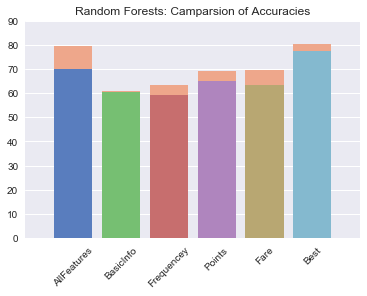

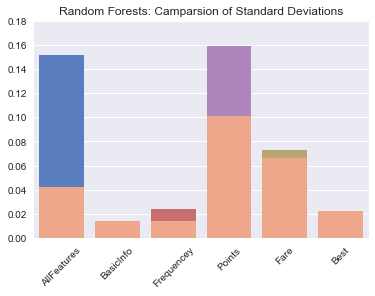

In [35]:
# Demonstration in terms of Accuracies & Standard Deviations
# The pink parts represent the change of data between corresponding forests and trees.
Rst = reduce(operator.add, Results)
figplot3(Rst[0::2], rst[0::2], "Features", "Acc", 100, "Random Forests: Camparsion of Accuracies")
figplot3(Rst[1::2], rst[1::2], "Features", "Std", 0, "Random Forests: Camparsion of Standard Deviations")